In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#importing the dataset into the dataframe to work on it
df = pd.read_csv("Titanic-Dataset.csv")

In [21]:
#data exploration
print(df.shape) #attributes - no bracket
print(df.info()) #methods - with bracket
print(df.describe())

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842 

In [23]:
print(df.isnull().sum()) #no. of nulls per column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [25]:
df.head() # first 5 values from top and .tail() - bottom 5 values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
# Fill Age with median-since its a numerical data even if some values have greater than median it wont effect median much
df['Age']=df['Age'].fillna(df['Age'].median())

# Fill Embarked with mode-since its a categorical data we will put the most frequent value at null values
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin (too many nulls)-because it have null values 75 % of overall values so filling it wont work and it is not good to train model on such data
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

In [35]:
df.head()
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [37]:
# encoding categorical data into numerical data like gender because its easy to train model on such data as there will only 2 options male-0 , female-1
#here we encoded sex and embarked as sex have 2 values (male,female) and embarked have 3 values (C,S,Q)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [39]:
from sklearn.preprocessing import StandardScaler
# here we are standardizing the age,fare column because the age have range of 0 to 80+ and the fare have range of 0 to 500 , if we dont standardize the
#columns the model will give more importance to fare because it have higher values so we use standardizing to keep every thing on same scale
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

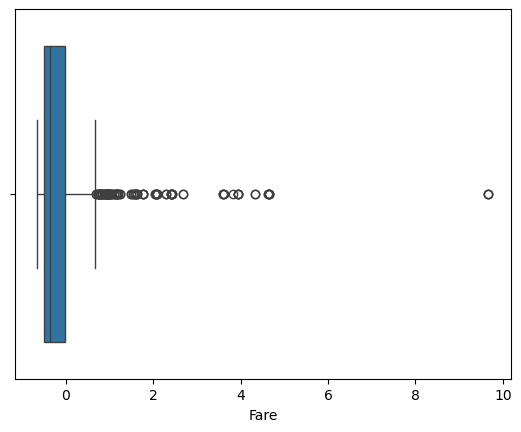

In [41]:
# Visualize outliers
sns.boxplot(x=df['Fare'])
plt.show()

# # Removing unusually high Fare values that are far from the average
z = np.abs((df['Fare'] - df['Fare'].mean()) / df['Fare'].std())
df = df[z < 3]
